In [64]:
# read data into a DataFrame
import pandas as pd
import seaborn as sns
data = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
data.head()

# data.tail()
# data.describe()
# print(data.describe().shape)

# dataFrame: rows and columns
# series: only a column

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

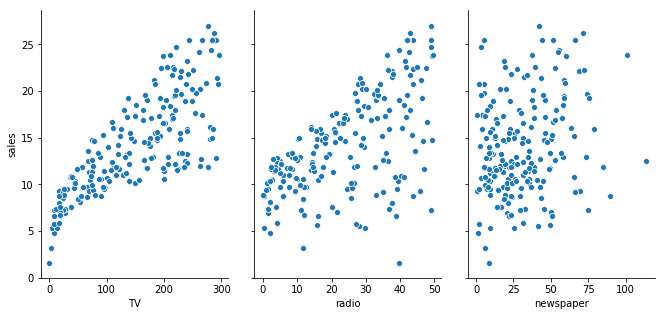

In [66]:
# producing pairs of scatterplots for each variable we specify
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=4.5, aspect=0.7)

In [67]:
# hp: linear relation between variables and response feature, with their own coefficient
# least squares criterion

In [68]:
indep_variables=['TV', 'radio', 'newspaper']
x=data[indep_variables]
print(x.head())
print(type(x))
y=data['sales']  # y=data.sales is equivalent
print(y.head())
print(type(y))

      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
<class 'pandas.core.frame.DataFrame'>
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64
<class 'pandas.core.series.Series'>


In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
# default split: 75%

In [70]:
print(x_train.shape)
print(x_test.shape)

(150, 3)
(50, 3)


In [71]:
from sklearn.linear_model import LinearRegression # import model
linreg_classifier = LinearRegression()  # instantiate the model
linreg_classifier.fit(x_train, y_train)  # fit with training data, each model differs here
# here: calculate line of best fit
print(linreg_classifier.intercept_)
print(linreg_classifier.coef_)
print(list(zip(indep_variables, linreg_classifier.coef_)))
y_pred = linreg_classifier.predict(x_test)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]
[('TV', 0.04656456787415029), ('radio', 0.17915812245088839), ('newspaper', 0.003450464711180378)]


In [72]:
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


In [73]:
# should we exclude newspaper? lets see if the error decreases
indep_variables=['TV', 'radio']
x=data[indep_variables]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
linreg_classifier = LinearRegression()  # instantiate the model
linreg_classifier.fit(x_train, y_train)  # fit with training data, each model differs here
# here: calculate line of best fit
print(list(zip(indep_variables, linreg_classifier.coef_)))
y_pred = linreg_classifier.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# performing better! newspaper feature should be left out?

[('TV', 0.04660234071076855), ('radio', 0.18117959203112896)]
1.3879034699382886


In [83]:
# let's use cross validation for feature selection

indep_variables = ['TV', 'radio', 'newspaper']
x=data[indep_variables]
from sklearn.cross_validation import cross_val_score
lm = LinearRegression()
scores = -cross_val_score(lm, x, y, cv=10, scoring='mean_squared_error')
print(scores.min())
indep_variables = ['TV', 'radio']
x=data[indep_variables]
from sklearn.cross_validation import cross_val_score
lm = LinearRegression()
scores = -cross_val_score(lm, x, y, cv=10, scoring='mean_squared_error')
print(scores.min())

1.302775395555732
1.273110826464318
